In [41]:
import utils.predictor_functions as pf
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [42]:
run_random_search = False
league = 'mls'
seasons = '2018-2024'
season_test = 2020

In [43]:
# Read the data
X_full, y, X_test_full, y_test, odds_test = pf.get_league_data(league, seasons, season_test)
display(X_full)

,game_date,season,home_team,away_team,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,...,away_away_win_pct,away_away_draw_pct,away_away_loss_pct,away_win_pct_last_games,away_draw_pct_last_games,away_loss_pct_last_games,away_score_last_games,away_conceded_last_games,away_xg_last_games,away_conceded_xg_last_games
0,2018-05-19,2018,Philadelphia,Real Salt Lake,36.666667,30.000000,20.000000,50.000000,40.000000,40.000000,...,0.000000,20.000000,80.000000,40.0,0.0,60.0,602.6,8046.4,1.70,2.46
1,2018-05-19,2018,New England,Columbus Crew,56.666667,50.000000,20.000000,30.000000,66.666667,16.666667,...,20.000000,40.000000,40.000000,60.0,40.0,0.0,4402.6,4200.0,1.92,0.82
2,2018-05-20,2018,Minnesota Utd,Sporting KC,36.363636,36.363636,0.000000,63.636364,60.000000,0.000000,...,60.000000,20.000000,20.000000,60.0,20.0,20.0,5202.4,4020.0,2.62,1.06
3,2018-05-26,2018,NY Red Bulls,Philadelphia,70.000000,70.000000,0.000000,30.000000,80.000000,0.000000,...,20.000000,0.000000,80.000000,60.0,0.0,40.0,6004.8,4620.2,1.30,1.10
4,2018-05-25,2018,Dynamo,NYCFC,50.000000,40.000000,30.000000,30.000000,60.000000,0.000000,...,28.571429,42.857143,28.571429,40.0,20.0,40.0,604.8,6284.0,1.90,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2019-10-06,2019,Toronto FC,Columbus Crew,47.474747,36.363636,33.333333,30.303030,50.000000,25.000000,...,25.000000,18.750000,56.250000,60.0,40.0,0.0,2.0,0.8,1.22,1.78
517,2019-10-06,2019,Philadelphia,NYCFC,55.555556,48.484848,21.212121,30.303030,62.500000,25.000000,...,37.500000,31.250000,31.250000,40.0,40.0,20.0,1.6,1.2,1.40,1.78
518,2019-10-06,2019,Orlando City,Chicago Fire,37.373737,27.272727,30.303030,42.424242,37.500000,18.750000,...,6.250000,31.250000,62.500000,20.0,60.0,20.0,1.6,1.0,1.94,1.08
519,2019-10-06,2019,D.C. United,FC Cincinnati,49.494949,39.393939,30.303030,30.303030,43.750000,31.250000,...,18.750000,12.500000,68.750000,20.0,40.0,40.0,0.6,1.6,1.20,1.54


In [44]:
# Define categorical and numerical columns
categorical_cols, numerical_cols = pf.set_numerical_categorical_cols(X_full)

# Keep selected columns only
X_train, y_train, X_test = pf.filter_datasets(X_full, y, X_test_full, categorical_cols, numerical_cols)

In [45]:
# hf.plot_feature_corr_chart(X_train, numerical_cols)

,season,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,home_home_loss_pct,home_win_pct_last_games,home_draw_pct_last_games,...,away_away_win_pct,away_away_draw_pct,away_away_loss_pct,away_win_pct_last_games,away_draw_pct_last_games,away_loss_pct_last_games,away_score_last_games,away_conceded_last_games,away_xg_last_games,away_conceded_xg_last_games
0,2018.0,36.666667,30.000000,20.000000,50.000000,40.000000,40.000000,20.000000,40.0,0.0,...,0.000000,20.000000,80.000000,40.0,0.0,60.0,602.6,8046.4,1.70,2.46
1,2018.0,56.666667,50.000000,20.000000,30.000000,66.666667,16.666667,16.666667,40.0,20.0,...,20.000000,40.000000,40.000000,60.0,40.0,0.0,4402.6,4200.0,1.92,0.82
2,2018.0,36.363636,36.363636,0.000000,63.636364,60.000000,0.000000,40.000000,40.0,0.0,...,60.000000,20.000000,20.000000,60.0,20.0,20.0,5202.4,4020.0,2.62,1.06
3,2018.0,70.000000,70.000000,0.000000,30.000000,80.000000,0.000000,20.000000,80.0,0.0,...,20.000000,0.000000,80.000000,60.0,0.0,40.0,6004.8,4620.2,1.30,1.10
4,2018.0,50.000000,40.000000,30.000000,30.000000,60.000000,0.000000,40.000000,60.0,20.0,...,28.571429,42.857143,28.571429,40.0,20.0,40.0,604.8,6284.0,1.90,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2019.0,47.474747,36.363636,33.333333,30.303030,50.000000,25.000000,25.000000,40.0,60.0,...,25.000000,18.750000,56.250000,60.0,40.0,0.0,2.0,0.8,1.22,1.78
517,2019.0,55.555556,48.484848,21.212121,30.303030,62.500000,25.000000,12.500000,40.0,20.0,...,37.500000,31.250000,31.250000,40.0,40.0,20.0,1.6,1.2,1.40,1.78
518,2019.0,37.373737,27.272727,30.303030,42.424242,37.500000,18.750000,43.750000,0.0,60.0,...,6.250000,31.250000,62.500000,20.0,60.0,20.0,1.6,1.0,1.94,1.08
519,2019.0,49.494949,39.393939,30.303030,30.303030,43.750000,31.250000,25.000000,60.0,20.0,...,18.750000,12.500000,68.750000,20.0,40.0,40.0,0.6,1.6,1.20,1.54


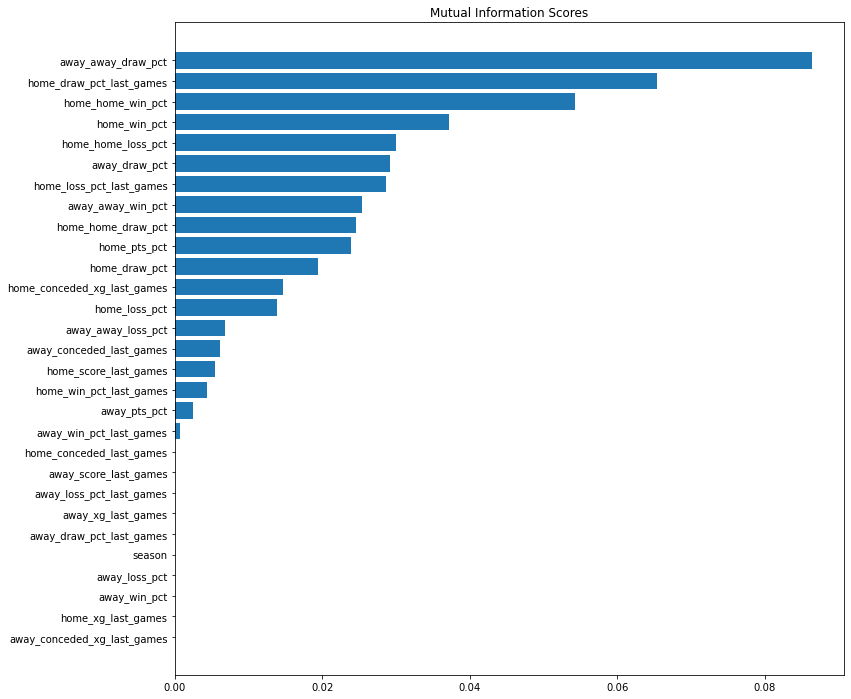

In [46]:
X_train = pf.transform_x(X_train, categorical_cols, numerical_cols)
X_test = pf.transform_x(X_test, categorical_cols, numerical_cols)

display(X_train)
first_mi_scores = pf.make_mi_scores(X_train, y_train)
pf.plot_mi_scores(first_mi_scores)

In [47]:
pf.create_cluster_features(X_train, X_test, first_mi_scores)

Total features to consider when clustering: 29


,season,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,home_home_loss_pct,home_win_pct_last_games,home_draw_pct_last_games,...,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29
0,2018.0,36.666667,30.000000,20.000000,50.000000,40.000000,40.000000,20.000000,40.0,0.0,...,1,0,4,0,2,1,0,3,2,0
1,2018.0,56.666667,50.000000,20.000000,30.000000,66.666667,16.666667,16.666667,40.0,20.0,...,3,2,3,2,0,0,0,3,0,3
2,2018.0,36.363636,36.363636,0.000000,63.636364,60.000000,0.000000,40.000000,40.0,0.0,...,3,4,3,0,0,2,2,1,4,3
3,2018.0,70.000000,70.000000,0.000000,30.000000,80.000000,0.000000,20.000000,80.0,0.0,...,2,3,0,0,2,1,1,2,4,3
4,2018.0,50.000000,40.000000,30.000000,30.000000,60.000000,0.000000,40.000000,60.0,20.0,...,1,0,3,0,0,2,3,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2019.0,47.474747,36.363636,33.333333,30.303030,50.000000,25.000000,25.000000,40.0,60.0,...,0,2,1,1,1,1,1,0,3,4
517,2019.0,55.555556,48.484848,21.212121,30.303030,62.500000,25.000000,12.500000,40.0,20.0,...,0,2,1,1,4,0,2,4,3,4
518,2019.0,37.373737,27.272727,30.303030,42.424242,37.500000,18.750000,43.750000,0.0,60.0,...,0,4,1,1,1,1,4,4,0,3
519,2019.0,49.494949,39.393939,30.303030,30.303030,43.750000,31.250000,25.000000,60.0,20.0,...,1,3,1,1,3,3,4,4,3,2


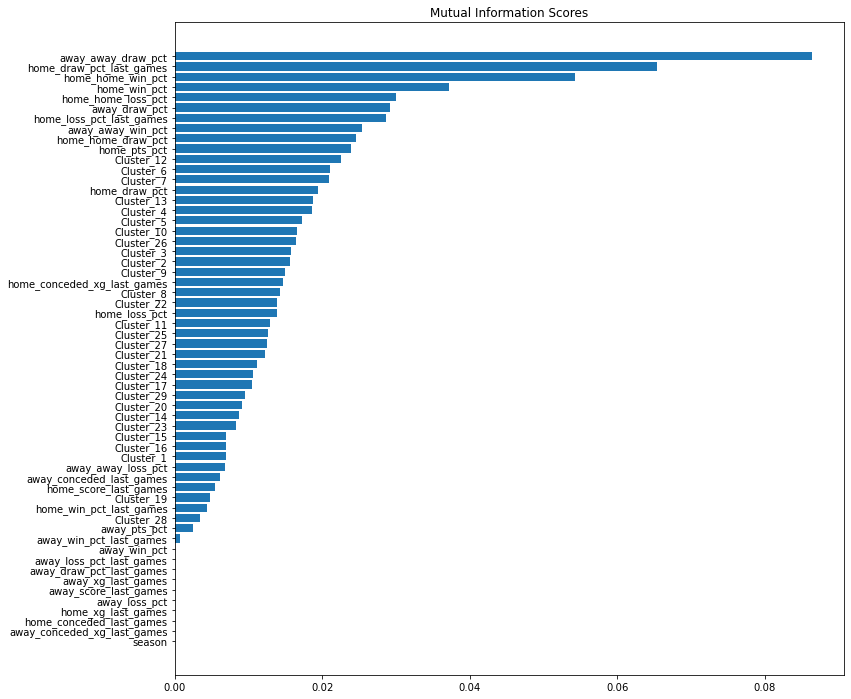

In [48]:
display(X_train)
second_mi_scores = pf.make_mi_scores(X_train, y_train)
pf.plot_mi_scores(second_mi_scores)

In [49]:
X_train, X_test = pf.apply_pca_datasets(X_train, X_test, second_mi_scores)

Total features to consider when doing the PCA: 47


In [50]:
if run_random_search: pf.run_random_forest_random_search(X_train, y_train)
    
# Best models found by the RandomSearch algorithm
# GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, random_state=0)
# RandomForestClassifier(criterion='entropy', max_depth=50, max_features='log2',
#                        min_samples_leaf=2, min_samples_split=10,
#                        n_estimators=2000, random_state=0)

,season,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,home_home_loss_pct,home_win_pct_last_games,home_draw_pct_last_games,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
0,2018.0,36.666667,30.000000,20.000000,50.000000,40.000000,40.000000,20.000000,40.0,0.0,...,-0.299087,-0.177294,-0.050833,-0.119742,0.061436,-1.214797e-15,4.923055e-18,8.430746e-16,8.624162e-17,-8.699008e-17
1,2018.0,56.666667,50.000000,20.000000,30.000000,66.666667,16.666667,16.666667,40.0,20.0,...,-0.311959,0.104600,-0.198222,0.001524,0.007322,7.930508e-16,-9.863977e-17,-1.035761e-16,7.339654e-17,1.519138e-16
2,2018.0,36.363636,36.363636,0.000000,63.636364,60.000000,0.000000,40.000000,40.0,0.0,...,-0.039597,-0.097769,0.032966,-0.080789,0.008642,1.330324e-15,6.333898e-16,-8.876368e-17,2.712240e-16,-1.288595e-16
3,2018.0,70.000000,70.000000,0.000000,30.000000,80.000000,0.000000,20.000000,80.0,0.0,...,-0.182668,0.056126,0.175857,-0.099973,0.073228,4.927652e-16,4.177913e-16,-4.553859e-17,3.078586e-16,2.067690e-16
4,2018.0,50.000000,40.000000,30.000000,30.000000,60.000000,0.000000,40.000000,60.0,20.0,...,0.130533,0.242050,-0.186601,0.028459,0.060854,-6.259545e-18,-3.891121e-16,-1.615625e-17,8.558076e-17,5.278144e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2019.0,47.474747,36.363636,33.333333,30.303030,50.000000,25.000000,25.000000,40.0,60.0,...,-0.078403,-0.051648,0.071295,0.051435,0.022368,-3.666710e-16,-1.465261e-17,-1.313499e-17,-2.159813e-17,3.844697e-17
517,2019.0,55.555556,48.484848,21.212121,30.303030,62.500000,25.000000,12.500000,40.0,20.0,...,-0.055990,0.069210,-0.060772,-0.020958,0.071123,-2.044546e-16,1.073116e-16,-4.071404e-17,4.384352e-17,9.147115e-18
518,2019.0,37.373737,27.272727,30.303030,42.424242,37.500000,18.750000,43.750000,0.0,60.0,...,0.061073,0.055509,-0.028233,0.041589,0.074821,-2.588494e-16,-6.957447e-17,1.246403e-17,2.604390e-17,-1.804843e-17
519,2019.0,49.494949,39.393939,30.303030,30.303030,43.750000,31.250000,25.000000,60.0,20.0,...,-0.013142,0.068500,0.068767,-0.034774,-0.104001,-4.121142e-16,1.112498e-17,7.803169e-17,2.251309e-17,1.032712e-18


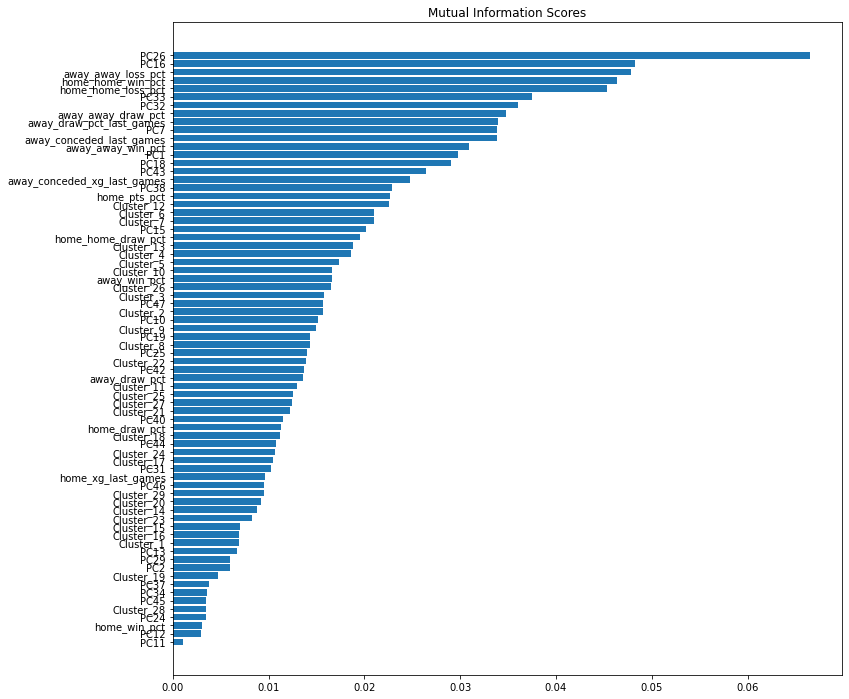

In [51]:
display(X_train)
min_mi_score=0.001
third_mi_scores = pf.make_mi_scores(X_train, y_train)
pf.plot_mi_scores(third_mi_scores[third_mi_scores > min_mi_score])

Results for model naive_bayes:
Classification Report:
              precision    recall  f1-score   support

           A       0.41      0.50      0.45        14
           D       0.38      0.33      0.35         9
           H       0.67      0.63      0.65        35

    accuracy                           0.55        58
   macro avg       0.48      0.49      0.48        58
weighted avg       0.56      0.55      0.55        58

Confusion Matrix:
[[22  5  8]
 [ 4  3  2]
 [ 7  0  7]]


Times when H was predicted: 33 (0.57)
Times when D was predicted: 8 (0.14)
Times when A was predicted: 17 (0.29)

Model profit: 1159.0
Maximum negative sequence:  4
Maximum positive sequence:  8
Maximum bet worth: 100.0
Minimum bet worth: 100.0


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,bet_worth,profit,progress
50,H,A,0.739396,0.193887,0.066718,1.61,4.80,4.37,100.0,-100.0,2000.0
51,H,H,0.067144,0.065354,0.867502,2.17,3.43,3.27,100.0,117.0,2017.0
52,D,D,0.034749,0.628572,0.336678,1.89,3.77,3.80,100.0,280.0,2297.0
53,H,A,0.446839,0.121876,0.431285,2.14,3.22,3.55,100.0,-100.0,2197.0
54,A,H,0.067558,0.055122,0.877320,1.79,4.53,3.59,100.0,-100.0,2097.0
55,D,H,0.080504,0.128995,0.790500,2.09,3.30,3.58,100.0,-100.0,1997.0
56,H,H,0.032056,0.192109,0.775835,1.35,7.58,5.45,100.0,35.0,2032.0
57,A,A,0.951570,0.015934,0.032496,3.24,2.15,3.51,100.0,115.0,2147.0
58,H,D,0.078660,0.869767,0.051573,2.30,2.98,3.44,100.0,-100.0,2047.0
59,D,D,0.155710,0.430416,0.413874,2.79,2.62,3.09,100.0,209.0,2256.0


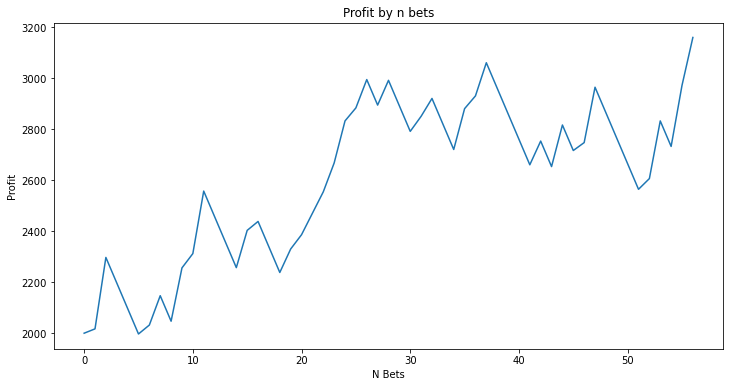

Results for model knn:
Classification Report:
              precision    recall  f1-score   support

           A       0.40      0.43      0.41        14
           D       0.25      0.11      0.15         9
           H       0.64      0.71      0.68        35

    accuracy                           0.55        58
   macro avg       0.43      0.42      0.41        58
weighted avg       0.52      0.55      0.53        58

Confusion Matrix:
[[25  3  7]
 [ 6  1  2]
 [ 8  0  6]]


Times when H was predicted: 39 (0.67)
Times when D was predicted: 4 (0.07)
Times when A was predicted: 15 (0.26)

Model profit: 1465.0
Maximum negative sequence:  3
Maximum positive sequence:  8
Maximum bet worth: 100.0
Minimum bet worth: 100.0


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,bet_worth,profit,progress
50,H,H,0.3,0.2,0.5,1.61,4.80,4.37,100.0,61.0,2000.0
51,H,H,0.2,0.2,0.6,2.17,3.43,3.27,100.0,117.0,2178.0
52,D,A,0.6,0.2,0.2,1.89,3.77,3.80,100.0,-100.0,2078.0
53,H,H,0.3,0.3,0.4,2.14,3.22,3.55,100.0,114.0,2192.0
54,A,H,0.2,0.2,0.6,1.79,4.53,3.59,100.0,-100.0,2092.0
55,D,H,0.1,0.3,0.6,2.09,3.30,3.58,100.0,-100.0,1992.0
56,H,H,0.0,0.2,0.8,1.35,7.58,5.45,100.0,35.0,2027.0
57,A,H,0.0,0.3,0.7,3.24,2.15,3.51,100.0,-100.0,1927.0
58,H,H,0.2,0.1,0.7,2.30,2.98,3.44,100.0,130.0,2057.0
59,D,H,0.1,0.1,0.8,2.79,2.62,3.09,100.0,-100.0,1957.0


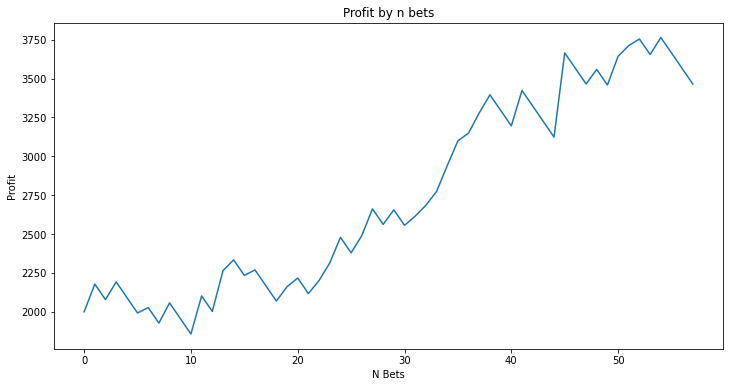

Results for model logistic_regression:
Classification Report:
              precision    recall  f1-score   support

           A       0.75      0.21      0.33        14
           D       0.00      0.00      0.00         9
           H       0.62      0.94      0.75        35

    accuracy                           0.62        58
   macro avg       0.46      0.39      0.36        58
weighted avg       0.56      0.62      0.53        58

Confusion Matrix:
[[33  1  1]
 [ 9  0  0]
 [11  0  3]]


Times when H was predicted: 53 (0.91)
Times when D was predicted: 1 (0.02)
Times when A was predicted: 4 (0.07)

Model profit: 1465.0
Maximum negative sequence:  4
Maximum positive sequence:  11
Maximum bet worth: 100.0
Minimum bet worth: 100.0


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,bet_worth,profit,progress
50,H,H,0.312317,0.327940,0.359743,1.61,4.80,4.37,100.0,61.0,2000.0
51,H,H,0.152975,0.141683,0.705342,2.17,3.43,3.27,100.0,117.0,2178.0
52,D,H,0.220248,0.307892,0.471860,1.89,3.77,3.80,100.0,-100.0,2078.0
53,H,H,0.318872,0.184569,0.496560,2.14,3.22,3.55,100.0,114.0,2192.0
54,A,H,0.249139,0.281215,0.469646,1.79,4.53,3.59,100.0,-100.0,2092.0
55,D,H,0.215156,0.231217,0.553627,2.09,3.30,3.58,100.0,-100.0,1992.0
56,H,H,0.199804,0.323947,0.476249,1.35,7.58,5.45,100.0,35.0,2027.0
57,A,H,0.373604,0.140919,0.485477,3.24,2.15,3.51,100.0,-100.0,1927.0
58,H,H,0.142100,0.352882,0.505018,2.30,2.98,3.44,100.0,130.0,2057.0
59,D,H,0.203867,0.295734,0.500399,2.79,2.62,3.09,100.0,-100.0,1957.0


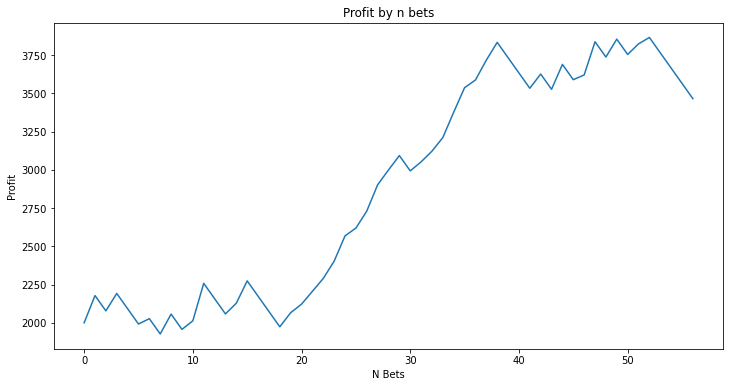

Results for model voting_classifier:
Classification Report:
              precision    recall  f1-score   support

           A       0.75      0.43      0.55        14
           D       0.33      0.11      0.17         9
           H       0.66      0.89      0.76        35

    accuracy                           0.66        58
   macro avg       0.58      0.48      0.49        58
weighted avg       0.63      0.66      0.61        58

Confusion Matrix:
[[31  2  2]
 [ 8  1  0]
 [ 8  0  6]]


Times when H was predicted: 47 (0.81)
Times when D was predicted: 3 (0.05)
Times when A was predicted: 8 (0.14)

Model profit: 2143.0
Maximum negative sequence:  3
Maximum positive sequence:  11
Maximum bet worth: 100.0
Minimum bet worth: 100.0


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,bet_worth,profit,progress
50,H,A,0.450571,0.240609,0.308820,1.61,4.80,4.37,100.0,-100.0,2000.0
51,H,H,0.140039,0.135679,0.724282,2.17,3.43,3.27,100.0,117.0,2017.0
52,D,D,0.284999,0.378822,0.336179,1.89,3.77,3.80,100.0,280.0,2297.0
53,H,H,0.355237,0.202148,0.442615,2.14,3.22,3.55,100.0,114.0,2411.0
54,A,H,0.172232,0.178779,0.648989,1.79,4.53,3.59,100.0,-100.0,2311.0
55,D,H,0.131887,0.220071,0.648043,2.09,3.30,3.58,100.0,-100.0,2211.0
56,H,H,0.077287,0.238685,0.684028,1.35,7.58,5.45,100.0,35.0,2246.0
57,A,A,0.441725,0.152284,0.405991,3.24,2.15,3.51,100.0,115.0,2361.0
58,H,D,0.140253,0.440883,0.418864,2.30,2.98,3.44,100.0,-100.0,2261.0
59,D,H,0.153192,0.275383,0.571425,2.79,2.62,3.09,100.0,-100.0,2161.0


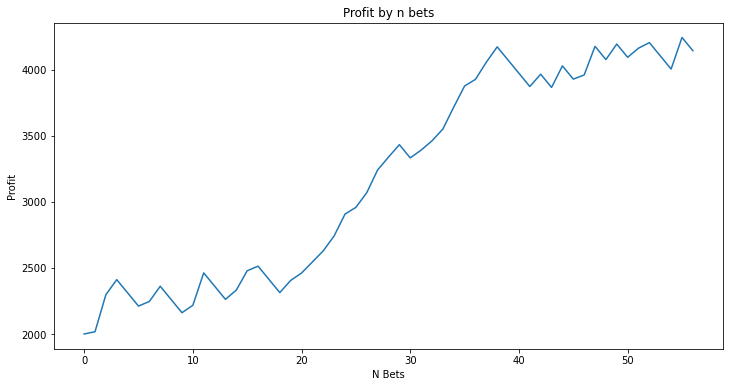

In [53]:
import json
import pandas as pd
from joblib import load
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

def won_bet(row):
    return 1 if row['profit'] > 0 else 0

dir_path = f"leagues_v2/{league}/best_models/{season_test}"
models_path = f"{dir_path}/best_models.json"
with open(models_path, 'rb') as file:
    models_dict = json.load(file)
    
models = models_dict.keys()
voting_classifier_estimators = []
for model in models:
    model_path = f"{dir_path}/{model}.joblib"
    try:
        loaded_model = load(model_path)
    except:
        with open(model_path, 'rb') as file:
            loaded_model = pickle.load(file)
    models_dict[model]['estimator'] = loaded_model

# Only predicting after 15 team games. It's shown that is more profitable
X_test_filtered = X_test.reset_index(drop=True)[50:]
y_test_filtered = y_test.reset_index(drop=True)[50:]
odds_test_filtered = odds_test.reset_index(drop=True)[50:]

progress_data = []
for model in models_dict.keys():
    print(f"Results for model {model}:")
    score = models_dict[model].get('score')
    if score:
        print('Training score:', score)
    my_pipeline = pf.build_pipeline(X_train, y_train, models_dict[model]['estimator'])
    test_results_df = pf.build_pred_df(my_pipeline, X_test_filtered, y_test_filtered, odds_test_filtered)
    display(test_results_df)
    pf.plot_betting_progress(test_results_df)
    test_results_df['won'] = test_results_df.apply(lambda x: won_bet(x), axis=1)
    total_won = test_results_df['won'].sum()
    progress_data.append([test_results_df['profit'].sum(), score, total_won/len(test_results_df)])
    
cols = ['profit', 'training_score', 'test_score']
profit_df = pd.DataFrame(progress_data, columns=cols, index=models_dict.keys())

In [54]:
display(profit_df)

,profit,training_score,test_score
naive_bayes,1159.0,None,0.534483
knn,1465.0,None,0.551724
logistic_regression,1465.0,None,0.603448
voting_classifier,2143.0,None,0.637931


In [55]:
test_results_df.describe()

,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,bet_worth,profit,progress,won
count,58.000000,58.000000,58.000000,57.000000,57.000000,57.000000,58.0,57.000000,57.000000,58.000000
mean,0.245986,0.216145,0.537869,2.332807,3.570351,3.853860,100.0,37.596491,3191.122807,0.637931
std,0.130070,0.082647,0.138214,0.994551,1.473372,0.548253,0.0,113.463471,789.649879,0.484796
min,0.052134,0.089557,0.268245,1.310000,1.350000,3.090000,100.0,-100.000000,2000.000000,0.000000
25%,0.149536,0.154162,0.415698,1.840000,2.510000,3.570000,100.0,-100.000000,2405.000000,0.000000
50%,0.214649,0.200727,0.558286,2.160000,3.220000,3.690000,100.0,59.000000,3332.000000,1.000000
75%,0.313094,0.256151,0.640747,2.650000,4.220000,3.970000,100.0,115.000000,3972.000000,1.000000
max,0.613481,0.440883,0.777404,8.270000,8.980000,5.450000,100.0,280.000000,4243.000000,1.000000
